In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime

In [20]:
def prettify(obj):
    return json.dumps(obj, sort_keys=True, indent=2)

In [22]:
username = input('Enter username: ')
password = input('Enter password: ')
headers = {'Content-Type': 'application/json'}

In [ ]:
with open ("api_key.json") as f:
    api_key = json.load(f)["mitchell"]

In [ ]:
def get_data(name, start_time, end_time, interval):
    base_url = 'https://itsnt2259.iowa.uiowa.edu/piwebapi/search/query?q=name:'
    url = base_url + name
    query = requests.get(url, auth=(username, password), headers=headers).json()
    self_url = query['Items'][0]['Links']['Self']
    point = requests.get(self_url, auth=(username, password), headers=headers).json()
    data_url = point['Links']['InterpolatedData']
    data_url = data_url + '/?startTime=-' + start_time + '&endTime=-' + end_time + '&interval=' + interval
    data = requests.get(data_url, auth=(username, password), headers=headers).json()
    return data

In [ ]:
'''
Correlate the daily historical campus electric load with hourly historical CO2 emissions.
This analysis would help ENGIE devise a program to reduce non-critical loads at the right times to improve the campus sustainability profile.
'''
# Total energy load is main_purch_el + main_gen_el + oakdale_purch_el + oakdale_gen_el
# Two seperate correlations for oakdale and main campus and a combined one

'\nCorrelate the daily historical campus electric load with hourly historical CO2 emissions.\nThis analysis would help ENGIE devise a program to reduce non-critical loads at the right times to improve the campus sustainability profile.\n'

In [ ]:
# Main Natural Gas
# Names
main_ng_names = ['PP_TB1_2_TB1_GAS_FLOW', 'HBLR_GAS_FLOW', 'PP_B7_Gas_Flow_Adj', 'PP_B8_Gas_Flow_Adj', 'PP_B10_FLT_235_FT', 'PP_BLR12_FT_006_KSCFH',
                 'PP_GG1_FUEL_FLOW', 'PP_GG2_FUEL_FLOW', 'PP_GG3_FUEL_FLOW', 'PP_GG4_FUEL_FLOW', 'PP_AF-XI-8220A']

# Main Purch El
main_purch_el_names = ['PP_Electric_Purch']

# Main Gen El
main_gen_el_names = ['PP_Electric_Gen']

# Blr 10 Pellets
blr_10_pellets_names = ['PP_CHS_B10WeighBelt_MvgAvg']

# Blr 11 Coal + Pellets
blr_11_coal_pellets_names = ['PP_SF-WIT-6044A']

# Blr 11 Oat Hulls
blr_11_oat_hulls_names = ['PP_BIO_Weight']

# TODO Oakdale Nat Gas Est. using steam and NG Monthly BTU Factors
# TODO Oakdale Purch El
# TODO Oakdale Gen El

In [ ]:
# Create a 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Graph the energy purchased over time
axs[0, 0].plot(df_main_purch_el['Date'], df_main_purch_el['Main Purch El'])
axs[0, 0].set_title('Main Purchased Energy')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Energy (MWh)')
axs[0, 0].grid(True)

# Graph the energy generated over time
axs[0, 1].plot(df_main_gen_el['Date'], df_main_gen_el['Main Gen El'])
axs[0, 1].set_title('Main Generated Energy')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Energy (MWh)')
axs[0, 1].grid(True)

# Graph the oakdale energy purchased over time
axs[1, 0].plot(df_oakdale_purch_el['Date'], df_oakdale_purch_el['Oakdale Purch El'])
axs[1, 0].set_title('Oakdale Purchased Energy')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Energy (MWh)')
axs[1, 0].grid(True)

# Graph the oakdale energy generated over time
axs[1, 1].plot(df_oakdale_gen_el['Date'], df_oakdale_gen_el['Oakdale Gen El'])
axs[1, 1].set_title('Oakdale Generated Energy')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Energy (MWh)')
axs[1, 1].grid(True)

plt.show()

NameError: name 'plt' is not defined

In [ ]:
df_main_energy_load = pd.DataFrame()
df_main_energy_load['Date'] = df_main_purch_el['Date']
df_main_energy_load['Energy Load'] = df_main_purch_el['Main Purch El'] + df_main_gen_el['Main Gen El']

df_oakdale_energy_load = pd.DataFrame()
df_oakdale_energy_load['Date'] = df_oakdale_purch_el['Date']
df_oakdale_energy_load['Energy Load'] = df_oakdale_purch_el['Oakdale Purch El'] + df_oakdale_gen_el['Oakdale Gen El']

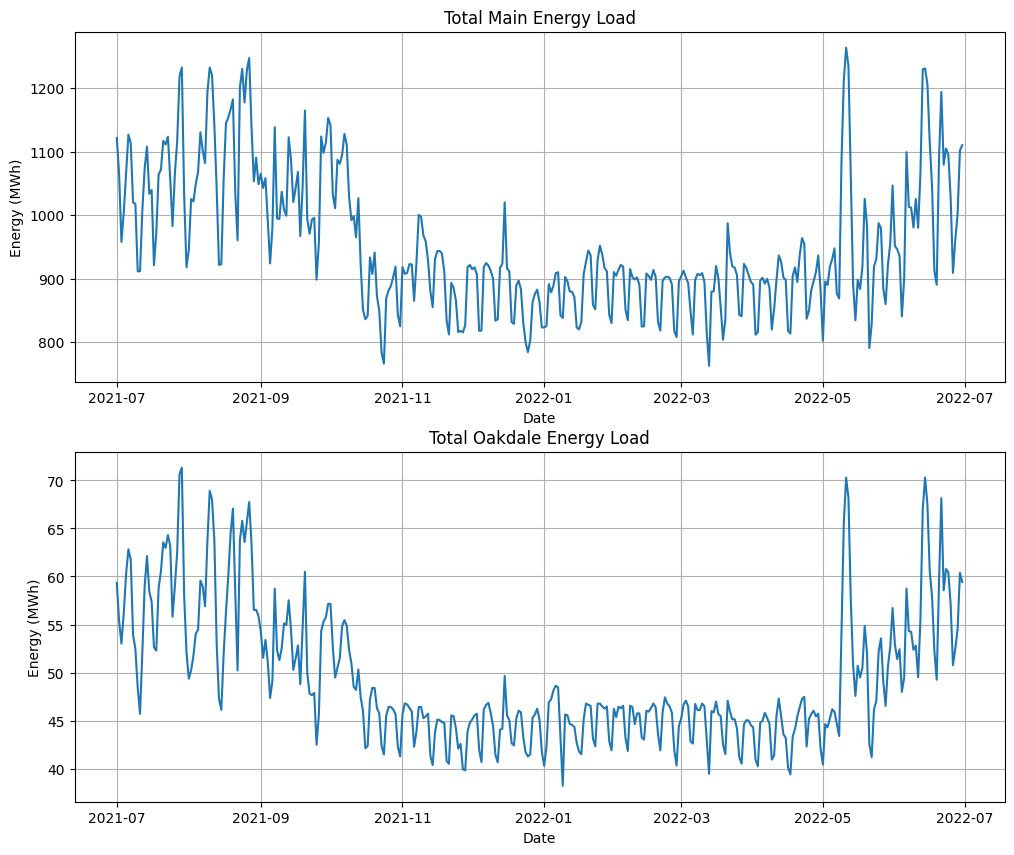

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs[0].plot(df_main_energy_load['Date'], df_main_energy_load['Energy Load'])
axs[0].set_title('Total Main Energy Load')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Energy (MWh)')
axs[0].grid(True)

axs[1].plot(df_oakdale_energy_load['Date'], df_oakdale_energy_load['Energy Load'])
axs[1].set_title('Total Oakdale Energy Load')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Energy (MWh)')
axs[1].grid(True)

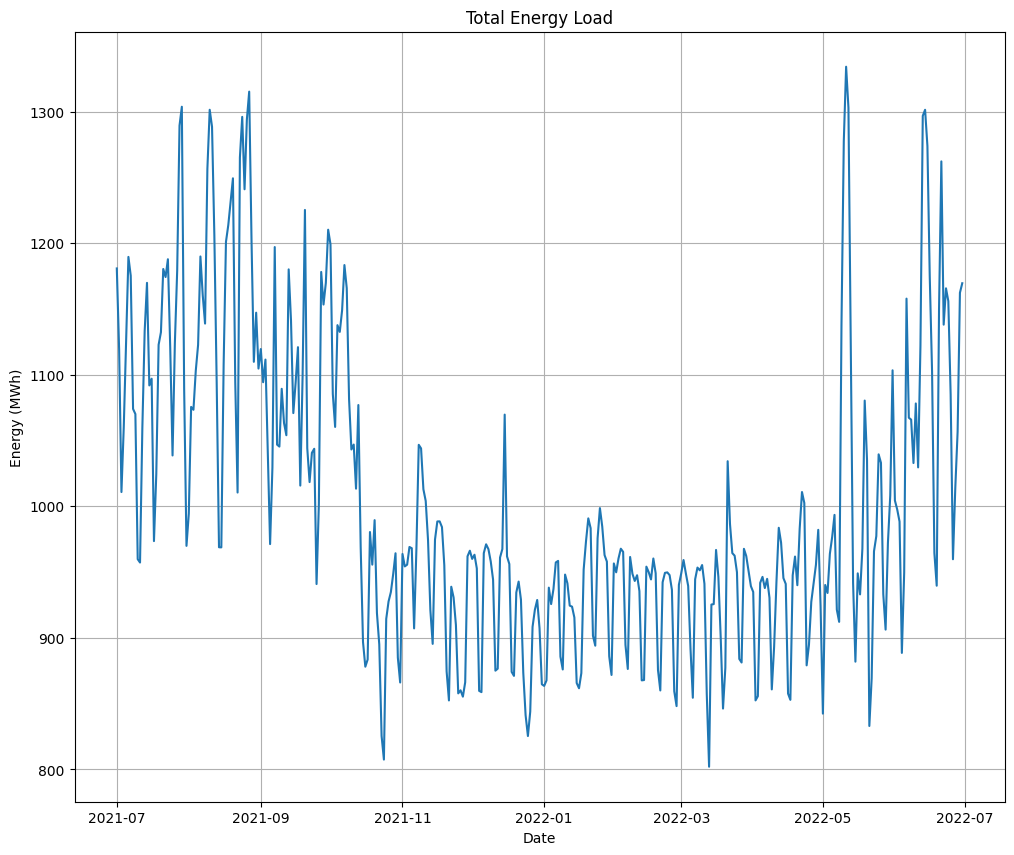

In [ ]:
df_total_load = pd.DataFrame()
df_total_load['Date'] = df_main_energy_load['Date']
df_total_load['Energy Load'] = df_main_energy_load['Energy Load'] + df_oakdale_energy_load['Energy Load']

fig, axs = plt.subplots(1, 1, figsize=(12, 10))
axs.plot(df_total_load['Date'], df_total_load['Energy Load'])
axs.set_title('Total Energy Load')
axs.set_xlabel('Date')
axs.set_ylabel('Energy (MWh)')
axs.grid(True)

In [ ]:
# Calculate the historical CO2 emissions
HEAT_CONVERSION_COEFFS = { 'natural_gas': 1.026, 'pellets': 20.89375, 'oat_hulls': 8.25, 'coal': 24.93 }
CO2_CONVERSION_COEFFS = {  'natural_gas': 53.06, 'pellets': 31.875, 'oat_hulls': 118.17, 'coal': 93.28}
# using regular CO2 for pellets, but biogenic for oat_hulls

# Using heat conversion calculate coal and pellets

df_main_nat_gas.head()
df_natural_gas_heat = HEAT_CONVERSION_COEFFS['natural_gas'] * df_main_nat_gas['SUM']
df_natural_gas_co2 = CO2_CONVERSION_COEFFS['natural_gas'] * df_natural_gas_heat
print(df_natural_gas_heat['SUM'].head())

KeyError: 'SUM'